<a href="https://colab.research.google.com/github/SimeonHristov99/AI_HandwrittenDigitClassifier/blob/main/TensorflowMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

Handwritten digit classifier
------------

The goal of this project is to build and train a digit classifier based on the [MNIST](https://wiki.pathmind.com/mnist) dataset. This is achieved by using [Tensorflow](https://www.tensorflow.org/).

### NOTE: The Keras API is only used to get the dataset, i.e. the neural networks are built using the [nn module](https://www.tensorflow.org/api_docs/python/tf/nn).

# Preparation

## Libraties used

In [259]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

## There are 60000 training images with dimensions 28 x 28. In other words, each sample is a square matrx and every element in that matrix is a value of a pixel. The lower the value the less "activation" that pixel has.

In [260]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


## There are 10 classes to predict. Each label is the actual digit.

In [261]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Use 20% of the training set to make a validation set.

In [262]:
X_train, val_train, y_train, val_test = train_test_split(X_train, y_train, test_size=0.2)

NUM_TRAIN = X_train.shape[0]

print('Training set:', X_train.shape, y_train.shape)
print('Validation set:', val_train.shape, val_test.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (48000, 28, 28) (48000,)
Validation set: (12000, 28, 28) (12000,)
Test set: (10000, 28, 28) (10000,)


## Here's what 10 samples look like.

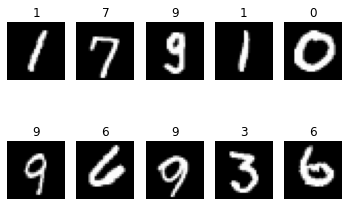

In [263]:
for i in range(10):
  plt.subplot(2, 5, i + 1)
  sample_idx = np.random.randint(NUM_TRAIN) # generate random number between 0 and 59_999
  image = X_train[sample_idx] # get that image
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(y_train[sample_idx])

plt.show()

# Building and training model

## Description of the model:
  - Layer 1: Flattening layer. Used to combine all pixels in one big vector.
  - Layer 2: Convolutional layer with 256 neurons.
  - Layer 3: Output layer with 10 neurons, representing the different classes.

In [245]:
# Coming soon ...